In [71]:
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

#per ignorare warnings
import warnings
warnings.filterwarnings('ignore')

#libreria per calcolo entropia
from scipy.stats import entropy

#libreria per calcolo Calinski-Harabasz score
from sklearn.metrics import calinski_harabasz_score

#libreria per calcolo davies_bouldin_score
from sklearn.metrics import davies_bouldin_score

from sklearn.utils import resample

In [72]:
from sklearn.metrics import pairwise_distances

def dunn_index(X, labels):
    unique_labels = np.unique(labels)
    min_intercluster_distance = np.inf
    max_intracluster_diameter = -np.inf

    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            cluster_i_points = X[labels == unique_labels[i]]
            cluster_j_points = X[labels == unique_labels[j]]
            
            # Calcola la distanza minima tra i cluster
            intercluster_distance = np.min(pairwise_distances(cluster_i_points, cluster_j_points))
            min_intercluster_distance = min(min_intercluster_distance, intercluster_distance)

        # Calcola il diametro intra-cluster massimo
        intracluster_diameter = np.max(pairwise_distances(X[labels == unique_labels[i]]))
        max_intracluster_diameter = max(max_intracluster_diameter, intracluster_diameter)

    return min_intercluster_distance / max_intracluster_diameter

In [73]:
# Function to calculate WCSS
def calculate_wcss(data, k):
    km = KMeans(n_clusters=k, n_init=1, random_state=0)
    km.fit(data)
    return km.inertia_

# Function to generate reference datasets and calculate WCSS for each reference dataset
def calculate_reference_wcss(data, k, num_reference_datasets=10):
    reference_wcss = []
    for _ in range(num_reference_datasets):
        reference_data = resample(data, replace=True, random_state=0)
        reference_wcss.append(calculate_wcss(reference_data, k))
    return reference_wcss

Silhouette Scores:
0.955050954064309
0.9113858862149101
0.7747405219329627
0.5644898416554639
0.45382039074096886
0.3803671554121946
0.3602198314726425
0.33866586812523153
0.3473632396512588
0.33219081393263183

Entropy Scores:
1.0
1.0
1.0
0.9999740313334506
0.9999740313334506
0.99971144175281
0.9994343896240242
0.9924820324406043
0.9983373765218819
0.9997662707810439

Calinski Harabasz Scores:
192592.47003393914
49967.8198792183
7817.855204337159
2039.132996113851
1168.2536752335218
773.345118629075
688.196351261978
594.5051639853981
636.1880931799215
553.7667861549683

Davies-Bouldin Scores:
0.06306865094229679
0.125039066236875
0.3178720733904416
0.6288829457916085
0.8263064572917118
1.0097611867350218
1.059651387632772
1.1303264752209274
1.1100021607217587
1.1710099660731943

Dunn-Index Scores:
4.397652922163067
2.0884176304204978
0.23308021208898985
0.021328619757130948
0.0075522380607846535
0.006662679174144467
0.00867721906505335
0.004283807501076427
0.003209392241207296
0.00254

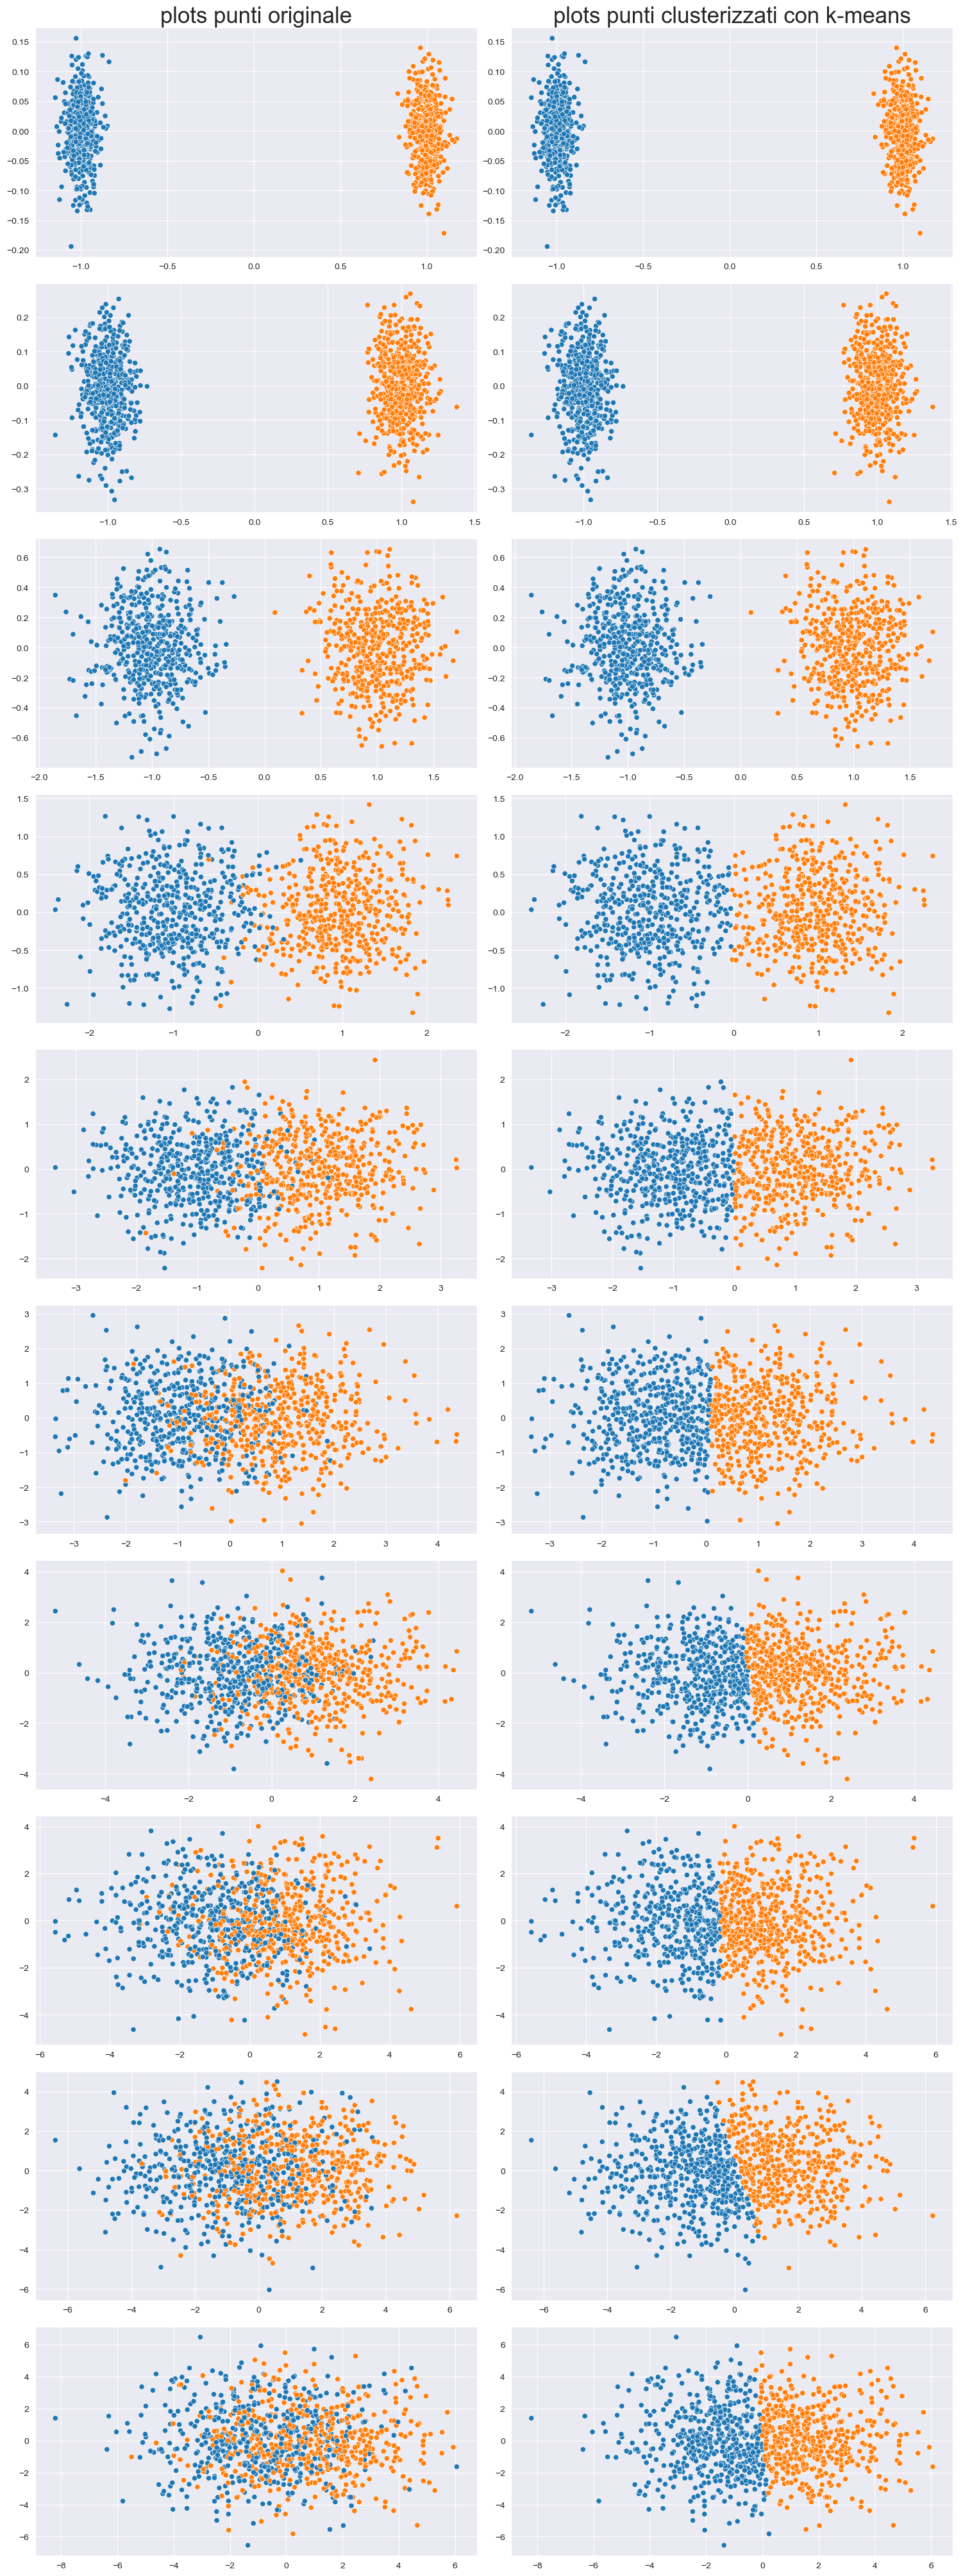

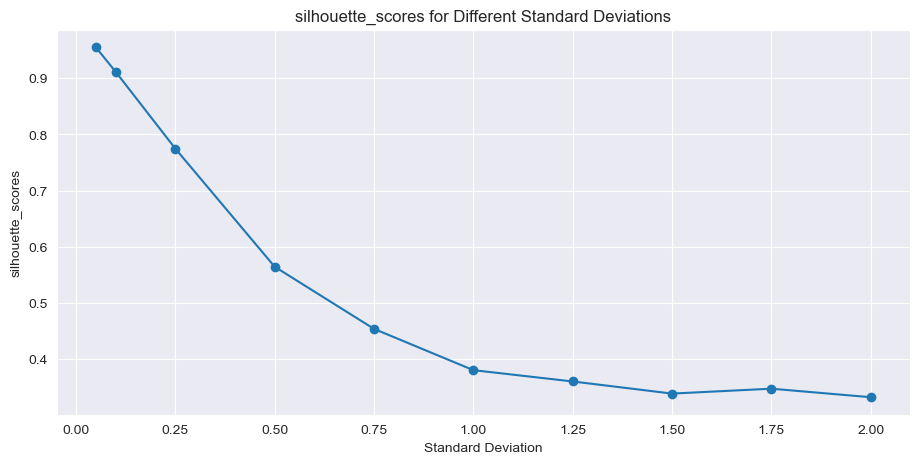

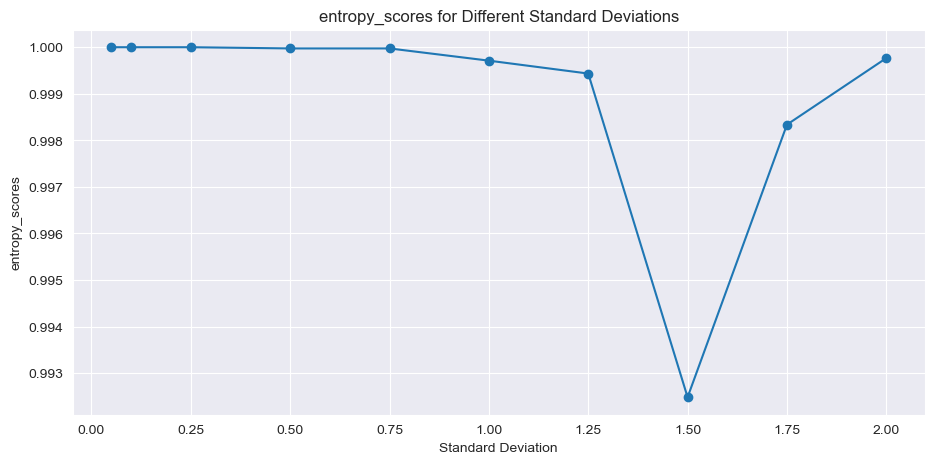

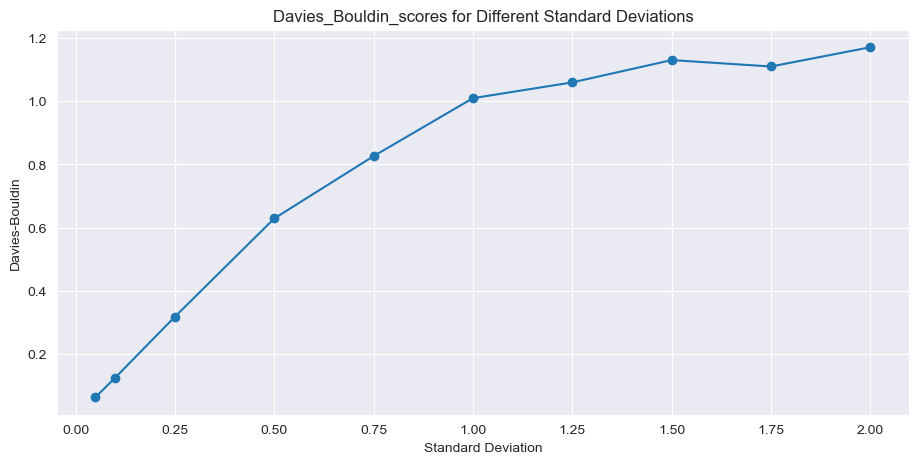

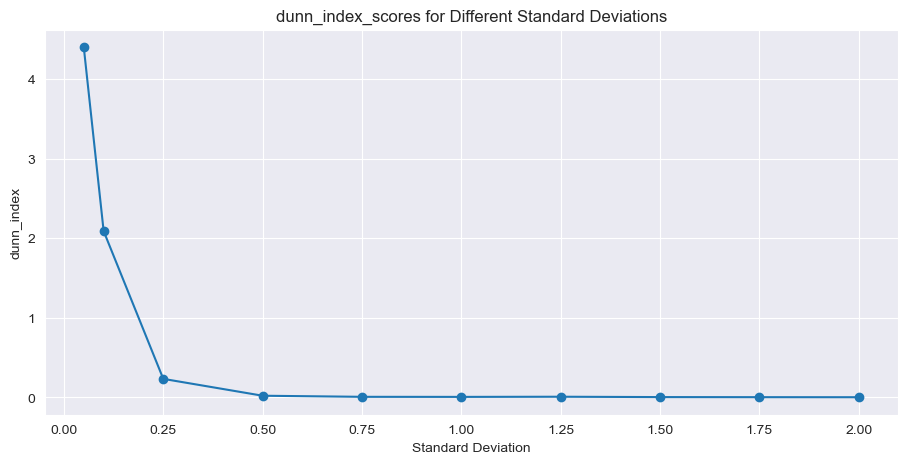

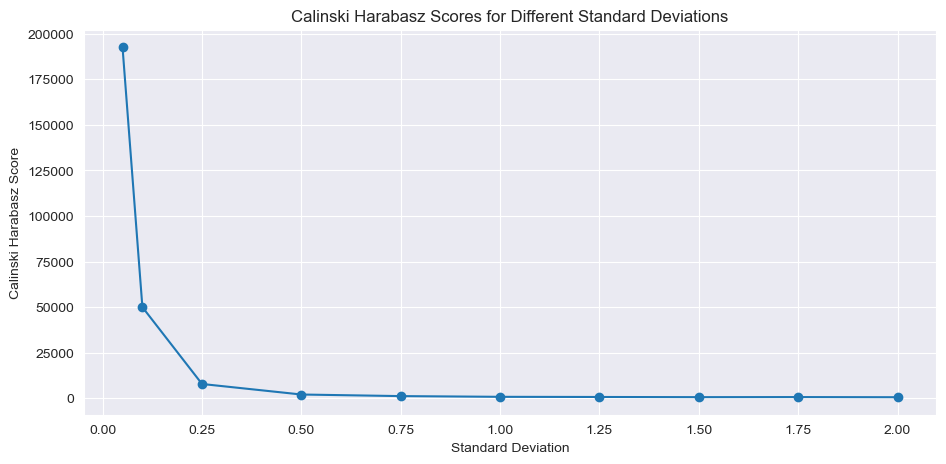

In [103]:
# Array per i valori delle metriche
silhouette_scores = []  
entropy_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []
dunn_index_scores = [] 
gap_scores = []

#deviazione standard
sds = [0.05, 0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

fig, axs = plt.subplots(10,2, figsize=(15,40))
sns.set_style("darkgrid")
fig.tight_layout()

r = 0
c = 0
c2= 1

for s in sds:
    X, y = make_blobs(n_samples=1000, centers=[[-1,0],[1,0]], cluster_std=s)
    if r==0:
        scatter=sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, ax=axs[r,c])
        scatter.set_title('plots punti originale', fontsize=25)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, ax=axs[r,c])

    #axs[r,c].set_xticks([])
    #axs[r,c].set_yticks([])
    axs[r,c].get_legend().remove()
    
    data = pd.DataFrame(np.zeros((1000, 3)))
    data.iloc[:, [0,1]] = X
    data.iloc[:, 2] = y
    data.to_csv("cluster_" + str(s) + ".csv")

    km = KMeans(n_clusters=2, n_init=1, random_state=0)
    km.fit(X)
    l = km.labels_
    cs = km.cluster_centers_
    if cs[0,0] > cs[1,0]:
        l = [1 if x == 0 else 0 for x in l]
    
    #calcolo silhouette
    silhouette_avg = silhouette_score(X, l)
    silhouette_scores.append(silhouette_avg)
    
    #calcolo entropia
    entropy_val = entropy(np.bincount(l) / len(l), base=2)
    entropy_scores.append(entropy_val)
    
    #calcolo Calinski-Harabasz index
    calinski_harabasz_index = calinski_harabasz_score(X, l)
    calinski_harabasz_scores.append(calinski_harabasz_index)
    
    # Calcolo Davies-Bouldin
    davies_bouldin_avg = davies_bouldin_score(X, l)
    davies_bouldin_scores.append(davies_bouldin_avg)
    
    # Calcolo Dunn index
    dunn_score = dunn_index(X, l)
    dunn_index_scores.append(dunn_score)
    
    '''
    # Calculate Gap Statistic
    # Calculate WCSS for the original dataset
    wcss_original = calculate_wcss(X, 2)

    # Calculate reference WCSS for each reference dataset
    reference_wcss = calculate_reference_wcss(X, 2)
    
    gap_statistic = np.mean(np.log(reference_wcss)) - np.log(wcss_original)
    gap_scores.append(gap_statistic)
    
        # Print the optimal values
    print("Optimal Standard Deviation:", optimal_standard_deviation)
    print("Optimal Gap Statistic:", gap_scores[optimal_index])
    '''

    if r==0:
            scatter2=sns.scatterplot(x=X[:,0], y=X[:,1], hue=l, ax=axs[r,c2])
            scatter2.set_title('plots punti clusterizzati con k-means', fontsize=25)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=l, ax=axs[r,c2])

    #axs[c,r].set_xticks([])
    #axs[c,r].set_yticks([])
    axs[r,c2].get_legend().remove()        
    
    r=r+1
    
# Stampa degli array
print("Silhouette Scores:")
for score in silhouette_scores:
    print(score)

print("\nEntropy Scores:")
for score in entropy_scores:
    print(score)
    
print("\nCalinski Harabasz Scores:")
for score in calinski_harabasz_scores:
    print(score)

print("\nDavies-Bouldin Scores:")
for score in davies_bouldin_scores:
    print(score)
    
print("\nDunn-Index Scores:")
for score in dunn_index_scores:
    print(score)
    
    

# Plot delle variazioni di Silhouette
plt.figure(figsize=(11, 5))
plt.plot(sds, silhouette_scores, marker='o')
plt.title('silhouette_scores for Different Standard Deviations')
plt.xlabel('Standard Deviation')
plt.ylabel('silhouette_scores')
plt.grid(True)
file_path = '/Users/andreaspagnolo/Desktop/uni/stage/variazioni_Silhouette_1.png'
plt.savefig(file_path)
plt.show()


# Plot delle variazioni di Entropy
plt.figure(figsize=(11, 5))
plt.plot(sds, entropy_scores, marker='o')
plt.title('entropy_scores for Different Standard Deviations')
plt.xlabel('Standard Deviation')
plt.ylabel('entropy_scores')
plt.grid(True)
file_path = '/Users/andreaspagnolo/Desktop/uni/stage/variazioni_Entropy_1.png'
plt.savefig(file_path)
plt.show()

# Plot delle variazioni di Davies_Bouldin
plt.figure(figsize=(11, 5))
plt.plot(sds, davies_bouldin_scores, marker='o')
plt.title('Davies_Bouldin_scores for Different Standard Deviations')
plt.xlabel('Standard Deviation')
plt.ylabel('Davies-Bouldin')
plt.grid(True)
file_path = '/Users/andreaspagnolo/Desktop/uni/stage/variazioni_Davies_Bouldin_1.png'
plt.savefig(file_path)
plt.show()

# Plot delle variazioni di dunn_index
plt.figure(figsize=(11, 5))
plt.plot(sds, dunn_index_scores, marker='o')
plt.title('dunn_index_scores for Different Standard Deviations')
plt.xlabel('Standard Deviation')
plt.ylabel('dunn_index')
plt.grid(True)
file_path = '/Users/andreaspagnolo/Desktop/uni/stage/variazioni_dunn_index_1.png'
plt.savefig(file_path)
plt.show()

'''
color = 'tab:green'
ax1.set_ylabel('Score')
ax1.plot(sds, gap_scores, marker='v', linestyle='-', color=color, label='Gap Statistic')
ax1.tick_params(axis='y')
'''

# Plot Calinski Harabasz Scores
plt.figure(figsize=(11, 5))
plt.plot(sds, calinski_harabasz_scores, marker='o')
plt.title('Calinski Harabasz Scores for Different Standard Deviations')
plt.xlabel('Standard Deviation')
plt.ylabel('Calinski Harabasz Score')
plt.grid(True)
file_path = '/Users/andreaspagnolo/Desktop/uni/stage/variazioni_Calinski_Harabasz_1.png'
plt.savefig(file_path)
plt.show()

fig.savefig("gaussians.png", facecolor="gray")

Silhouette Scores:
0.5231770338185358
0.5236673002637073
0.4969480708783215
0.4321570508701087
0.34851745062320316
0.3438674412652773

Entropy Scores:
0.9775696629057534
0.9593795191444577
0.9482102328088211
0.9333930737612746
0.999107261904943
0.9988339010532259

Calinski Harabasz Scores:
505.69498593279224
454.7914778141793
377.5125634095005
281.0543090934223
238.97790104784772
232.84604101170015

Davies-Bouldin Scores:
0.8043264661462324
0.8398935005109184
0.925802416480313
1.0594174615126835
1.1906110774485672
1.208771499761885

Dunn-Index Scores:
0.0202996646094552
0.026919615168873923
0.022973836304669155
0.021262804003380913
0.009406161169058909
0.014737408903722795


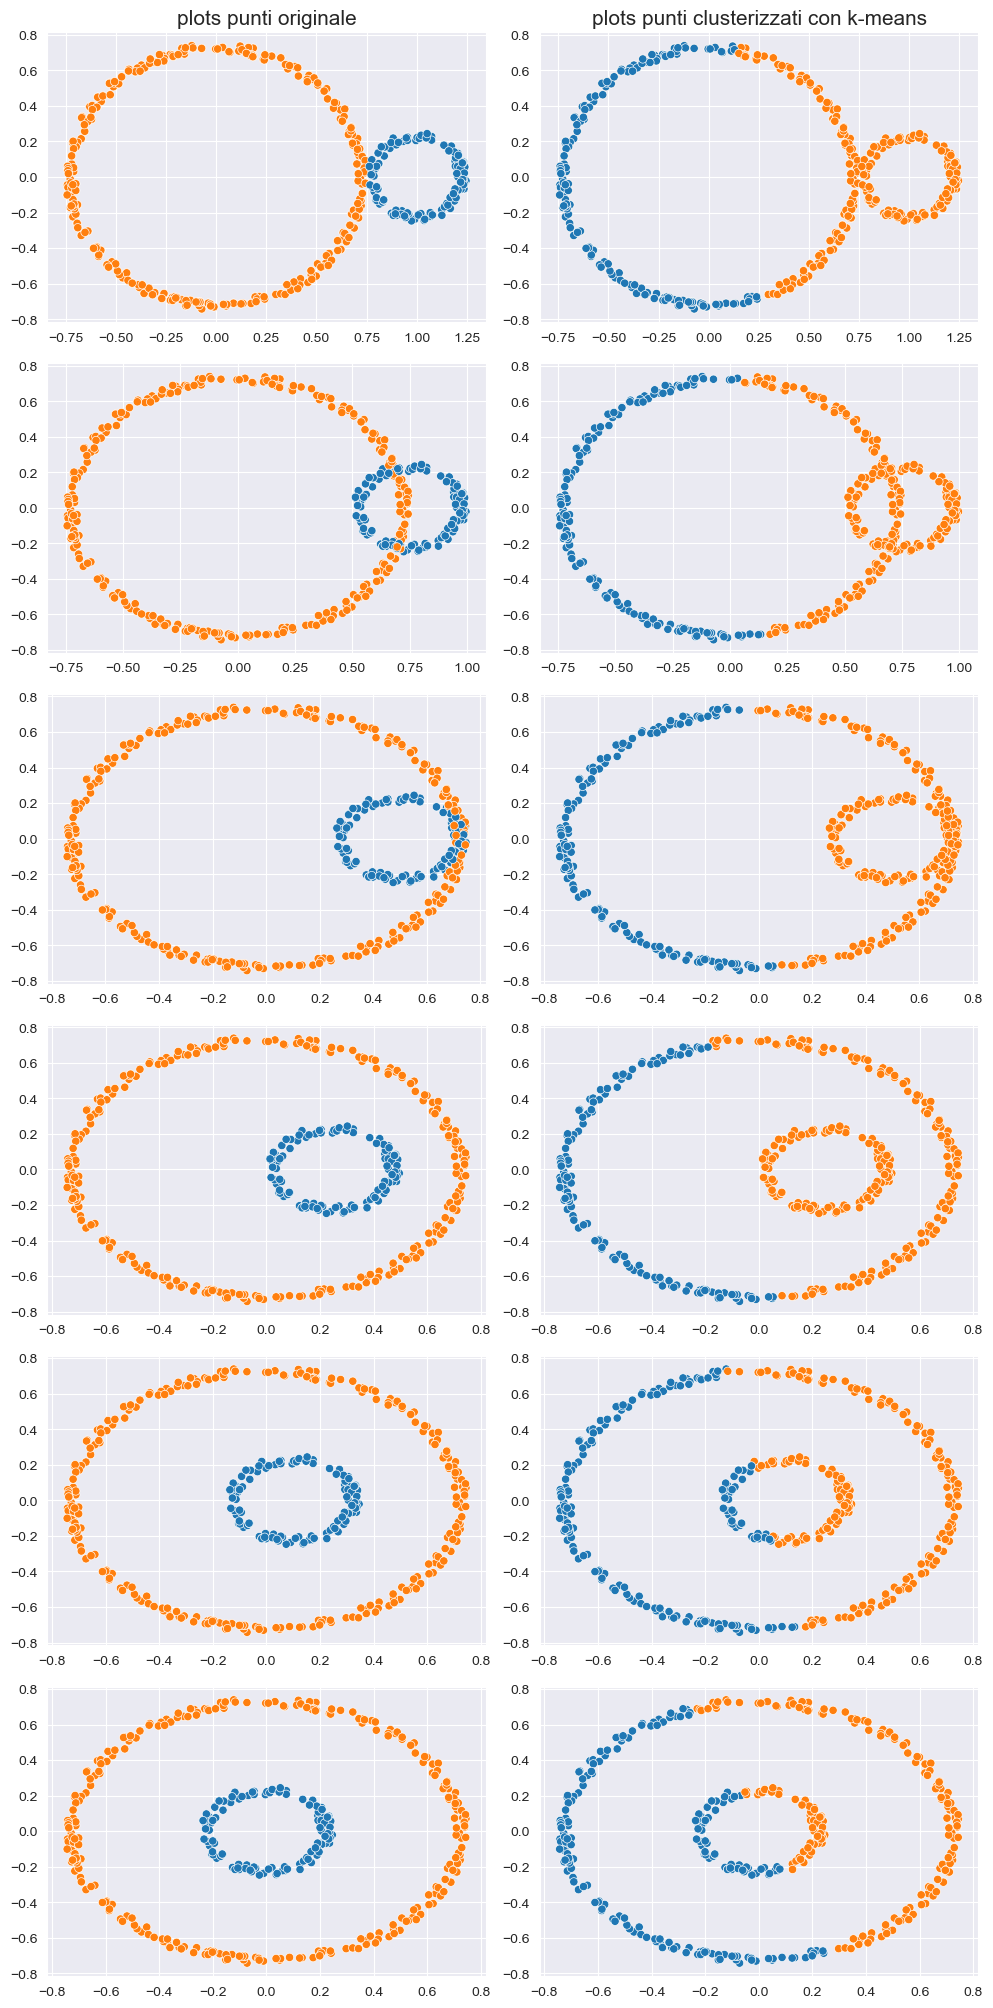

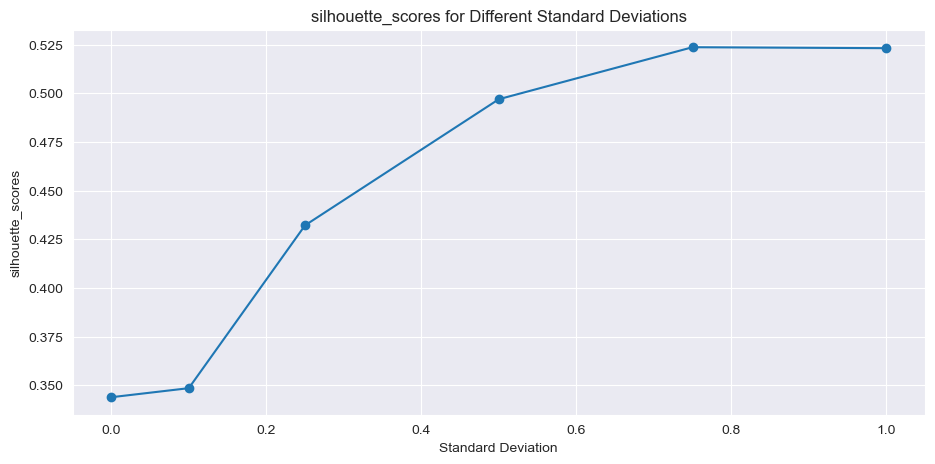

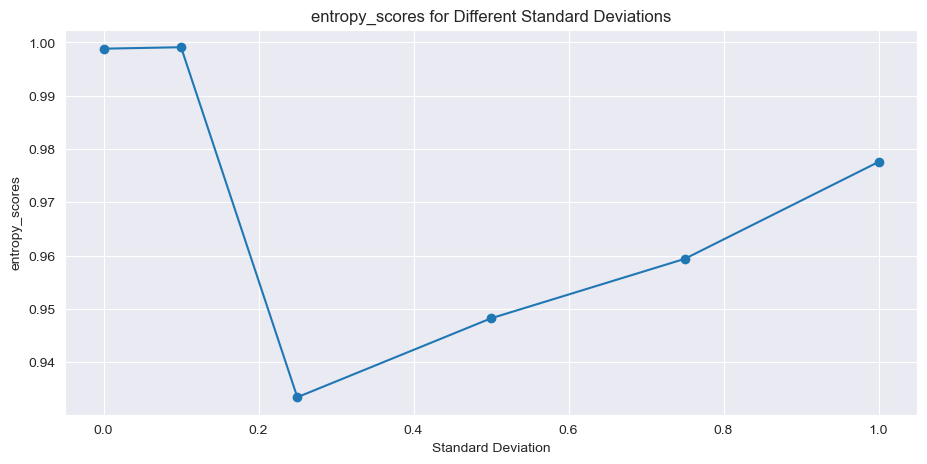

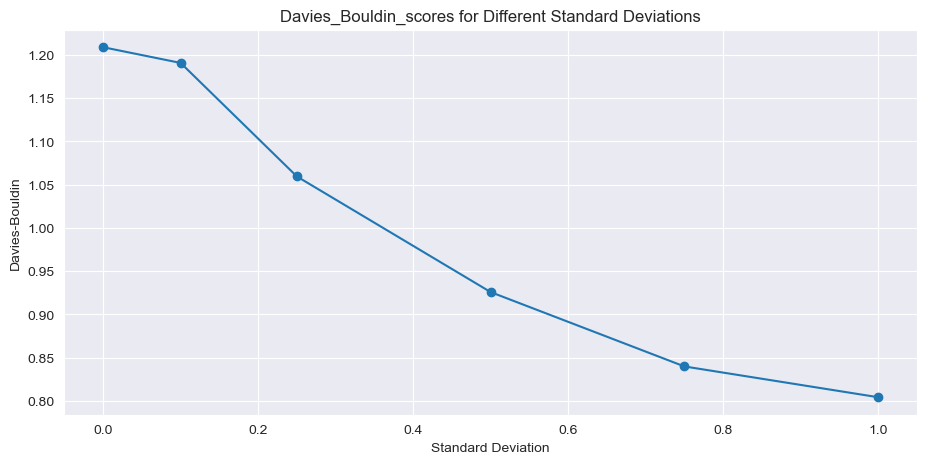

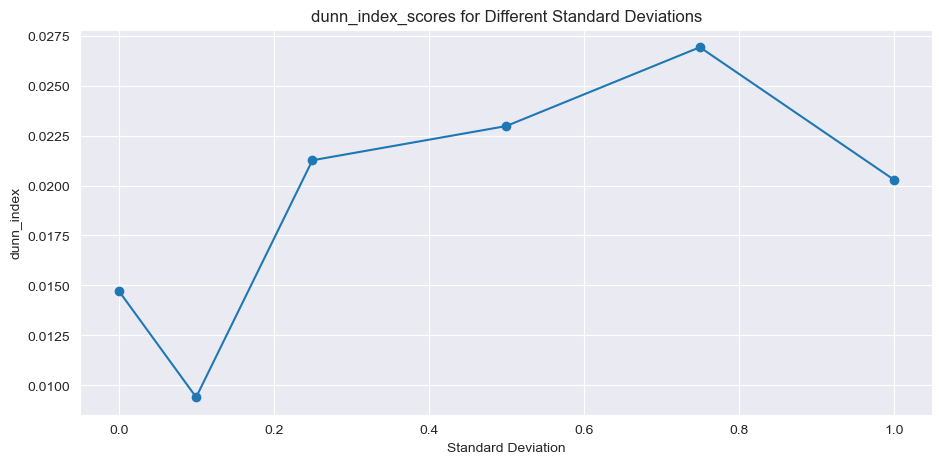

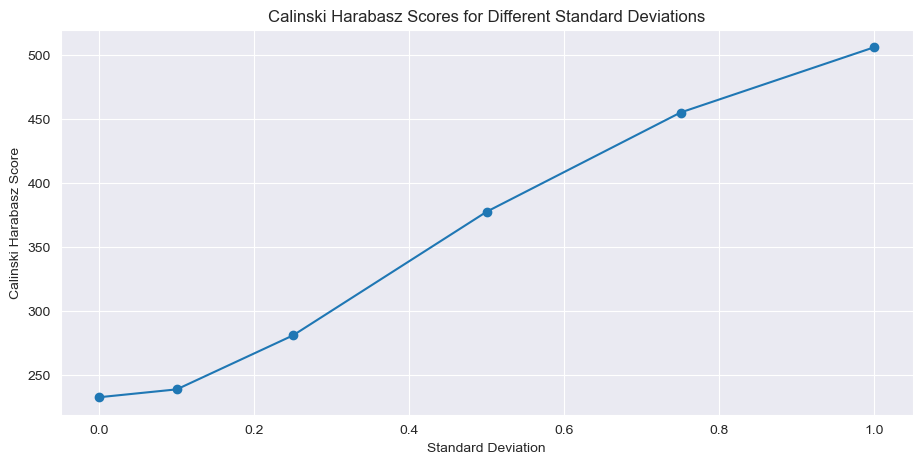

In [104]:
# Array per i valori delle metriche
silhouette_scores = []  
entropy_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []
dunn_index_scores = [] 
gap_scores = []


#deviazione standard
sds = np.array([0, 0.1, 0.25, 0.5, 0.75, 1])[::-1]
#print(sds)

fig, axs = plt.subplots(6,2, figsize=(10,20))
sns.set_style("darkgrid")
fig.tight_layout()

r = 0
c = 0
c2= 1

for s in sds:
    #print(s)
    centers = np.array([[s,0],[0,0]])
    
    X, y = make_blobs(n_samples=[1000,10000], centers=centers, cluster_std=[0.25,1], random_state=0)
    
    cond1 = ((0.20**2 <= (X[:,0]-centers[0,0])**2 + (X[:,1] - centers[0,1])**2) & ((X[:,0]-centers[0,0])**2 + (X[:,1] - centers[0,1])**2 <= 0.25**2))
    cond2 = ((0.7**2 <=(X[:,0]-centers[1,0])**2 + (X[:,1] - centers[1,1])**2) & ((X[:,0]-centers[1,0])**2 + (X[:,1] - centers[1,1])**2 <= 0.75**2))
    X_temp = X[((y==0) & cond1) | ((y==1) & cond2)]
    y = y[((y==0) & cond1) | ((y==1) & cond2)]
    X = X_temp
    
    if r==0:
        scatter=sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, ax=axs[r,c])
        scatter.set_title('plots punti originale', fontsize=15)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, ax=axs[r,c])

    #axs[r,c].set_xticks([])
    #axs[r,c].set_yticks([])
    axs[r,c].get_legend().remove()
    
    data = pd.DataFrame(np.zeros((X.shape[0], 3)))
    data.iloc[:, [0,1]] = X
    data.iloc[:, 2] = y
    data.to_csv("cluster_" + str(s) + ".csv")

    km = KMeans(n_clusters=2, n_init=1, random_state=0)
    km.fit(X)
    l = km.labels_
    cs = km.cluster_centers_
    if cs[0,0] > cs[1,0]:
        l = [1 if x == 0 else 0 for x in l]
    
    #calcolo silhouette
    silhouette_avg = silhouette_score(X, l)
    silhouette_scores.append(silhouette_avg)
    #print(f"Silhouette Score for cluster_{s}: {silhouette_avg}")
    
    #calcolo entropia
    entropy_val = entropy(np.bincount(l) / len(l), base=2)
    entropy_scores.append(entropy_val)
    #print(f"Entropia Score for cluster_{s}: {entropy_val}")

    
    #calcolo Calinski-Harabasz index
    calinski_harabasz_index = calinski_harabasz_score(X, l)
    calinski_harabasz_scores.append(calinski_harabasz_index)
    #print(f"Calinski-Harabasz Score for cluster_{s}: {calinski_harabasz_index}")

    
    # Calcolo Davies-Bouldin
    davies_bouldin_avg = davies_bouldin_score(X, l)
    davies_bouldin_scores.append(davies_bouldin_avg)
    #print(f"Davies-Bouldin Score for cluster_{s}: {davies_bouldin_avg}")
    
    # Calcolo Dunn index
    dunn_score = dunn_index(X, l)
    dunn_index_scores.append(dunn_score)

    if r==0:
        scatter2=sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, ax=axs[r,c2])
        scatter2.set_title('plots punti clusterizzati con k-means', fontsize=15)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=l, ax=axs[r,c2])

    #axs[c,r].set_xticks([])
    #axs[c,r].set_yticks([])
    axs[r,c2].get_legend().remove()
    
    r=r+1 
    
# Stampa degli array
print("Silhouette Scores:")
for score in silhouette_scores:
    print(score)

print("\nEntropy Scores:")
for score in entropy_scores:
    print(score)
    
print("\nCalinski Harabasz Scores:")
for score in calinski_harabasz_scores:
    print(score)

print("\nDavies-Bouldin Scores:")
for score in davies_bouldin_scores:
    print(score)
    
print("\nDunn-Index Scores:")
for score in dunn_index_scores:
    print(score)       
               
# Plot delle variazioni di Silhouette
plt.figure(figsize=(11, 5))
plt.plot(sds, silhouette_scores, marker='o')
plt.title('silhouette_scores for Different Standard Deviations')
plt.xlabel('Standard Deviation')
plt.ylabel('silhouette_scores')
plt.grid(True)
file_path = '/Users/andreaspagnolo/Desktop/uni/stage/variazioni_Silhouette_2.png'
plt.savefig(file_path)
plt.show()


# Plot delle variazioni di Entropy
plt.figure(figsize=(11, 5))
plt.plot(sds, entropy_scores, marker='o')
plt.title('entropy_scores for Different Standard Deviations')
plt.xlabel('Standard Deviation')
plt.ylabel('entropy_scores')
plt.grid(True)
file_path = '/Users/andreaspagnolo/Desktop/uni/stage/variazioni_Entropy_2.png'
plt.savefig(file_path)
plt.show()

# Plot delle variazioni di Davies_Bouldin
plt.figure(figsize=(11, 5))
plt.plot(sds, davies_bouldin_scores, marker='o')
plt.title('Davies_Bouldin_scores for Different Standard Deviations')
plt.xlabel('Standard Deviation')
plt.ylabel('Davies-Bouldin')
plt.grid(True)
file_path = '/Users/andreaspagnolo/Desktop/uni/stage/variazioni_Davies_Bouldin_2.png'
plt.savefig(file_path)
plt.show()

# Plot delle variazioni di dunn_index
plt.figure(figsize=(11, 5))
plt.plot(sds, dunn_index_scores, marker='o')
plt.title('dunn_index_scores for Different Standard Deviations')
plt.xlabel('Standard Deviation')
plt.ylabel('dunn_index')
plt.grid(True)
file_path = '/Users/andreaspagnolo/Desktop/uni/stage/variazioni_dunn_index_2.png'
plt.savefig(file_path)
plt.show()

'''
color = 'tab:green'
ax1.set_ylabel('Score')
ax1.plot(sds, gap_scores, marker='v', linestyle='-', color=color, label='Gap Statistic')
ax1.tick_params(axis='y')
'''

# Plot Calinski Harabasz Scores
plt.figure(figsize=(11, 5))
plt.plot(sds, calinski_harabasz_scores, marker='o')
plt.title('Calinski Harabasz Scores for Different Standard Deviations')
plt.xlabel('Standard Deviation')
plt.ylabel('Calinski Harabasz Score')
plt.grid(True)
file_path = '/Users/andreaspagnolo/Desktop/uni/stage/variazioni_Calinski_Harabasz_2.png'
plt.savefig(file_path)
plt.show()

fig.savefig("circles2.png", facecolor="gray")

Silhouette Scores:
0.7414739747715837
0.5977139563358773
0.5136016726566719
0.4467651069955013
0.3214237226471164
0.3795470137808519

Entropy Scores:
0.9999985717218403
0.9999537798860131
0.9999405690005647
0.9999996295822285
0.9999807087565236
0.9999088081925217

Calinski Harabasz Scores:
60669.50563075163
63093.667056580976
61067.79218590599
57645.151431856706
45593.7742576422
84436.57682312591

Davies-Bouldin Scores:
0.39830629180022814
0.6545281129936036
0.8163681521830758
0.9443226009255047
1.2770910319874687
1.0382569590236552

Dunn-Index Scores:
0.7900322962144765
0.3244725315861021
0.14592719773865112
0.022737022123423063
0.00039531365408484044
0.00037104920688047204


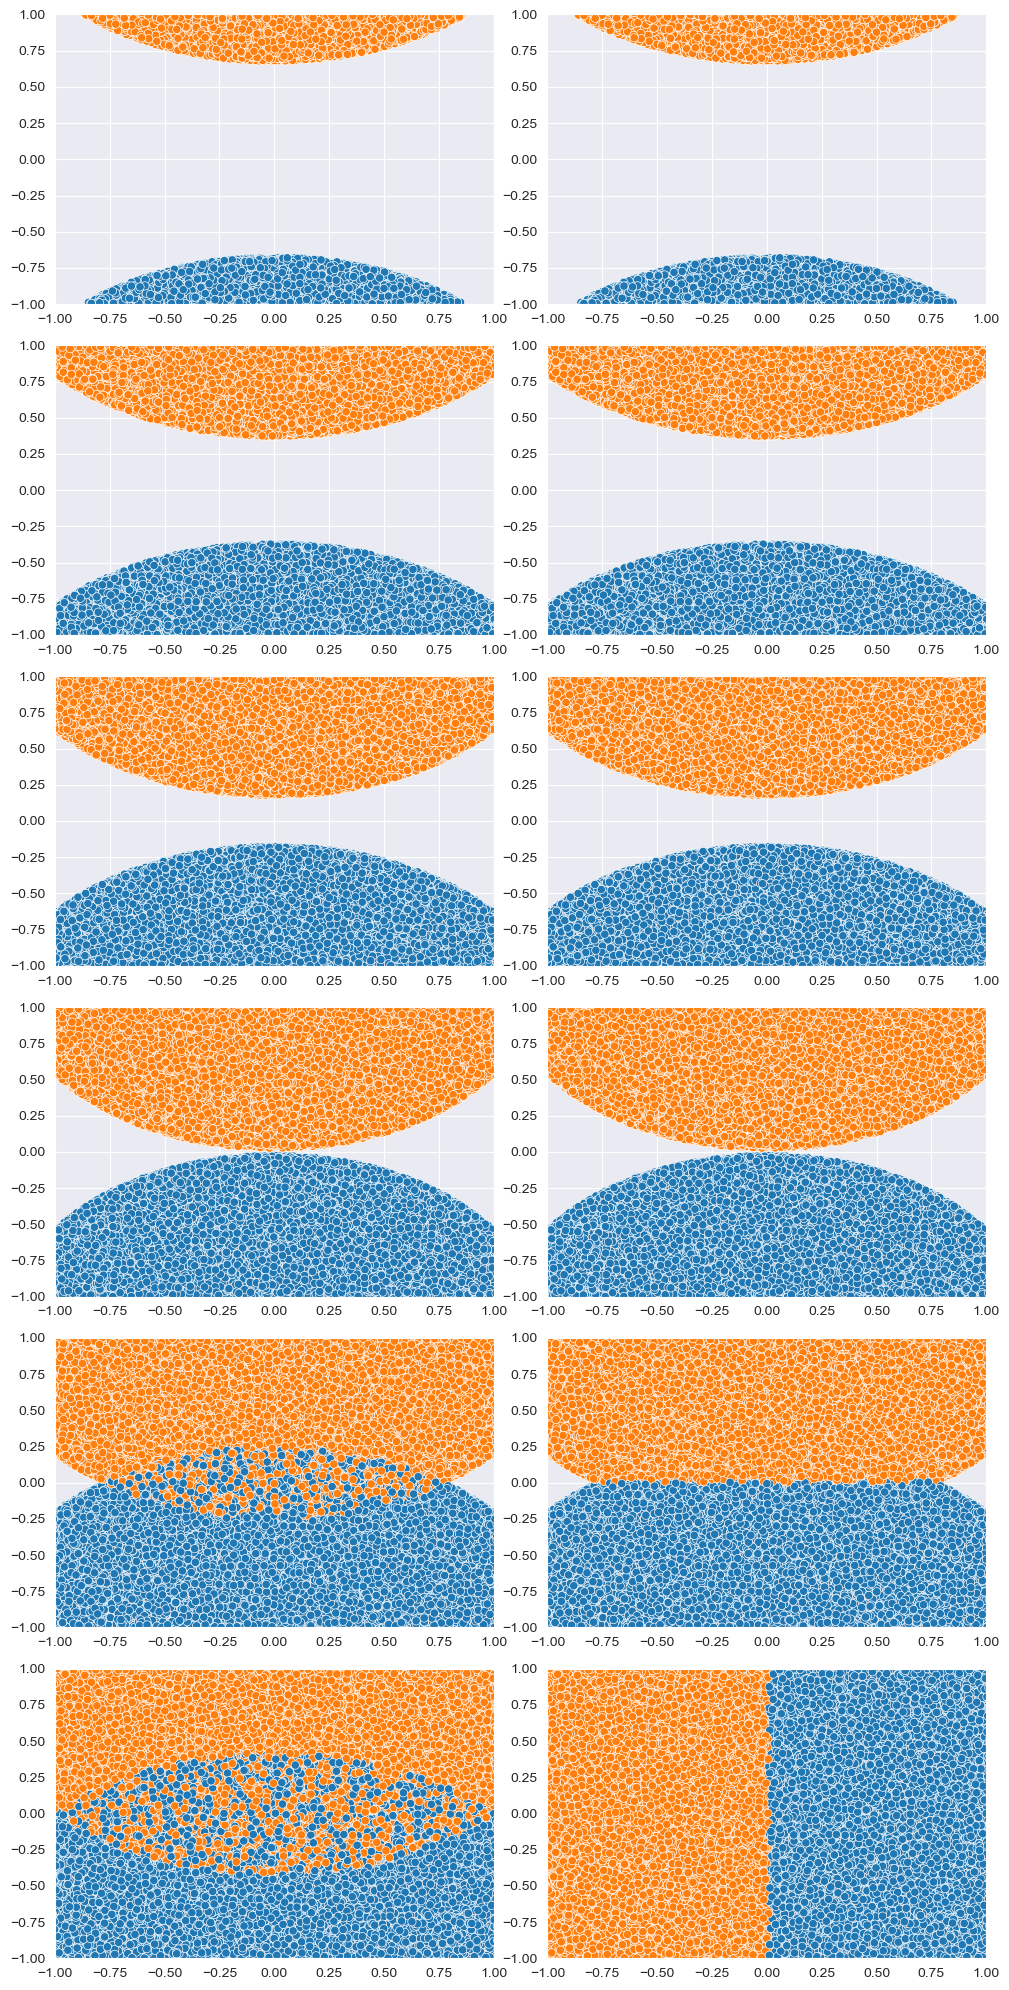

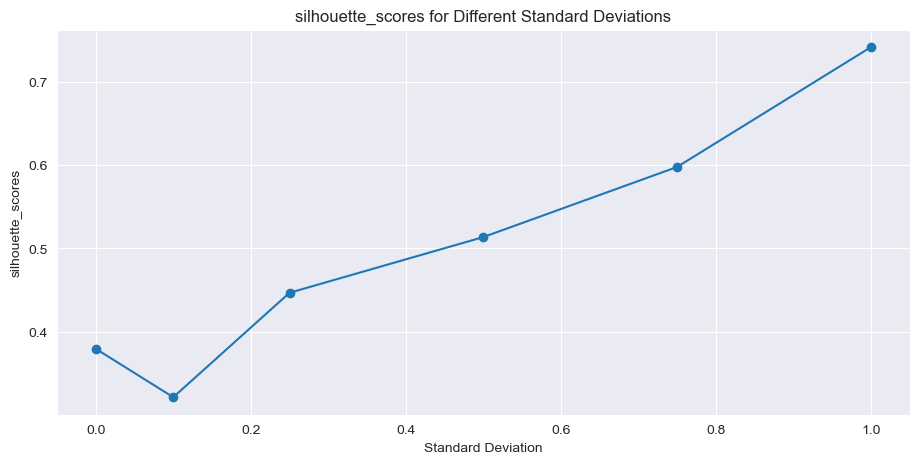

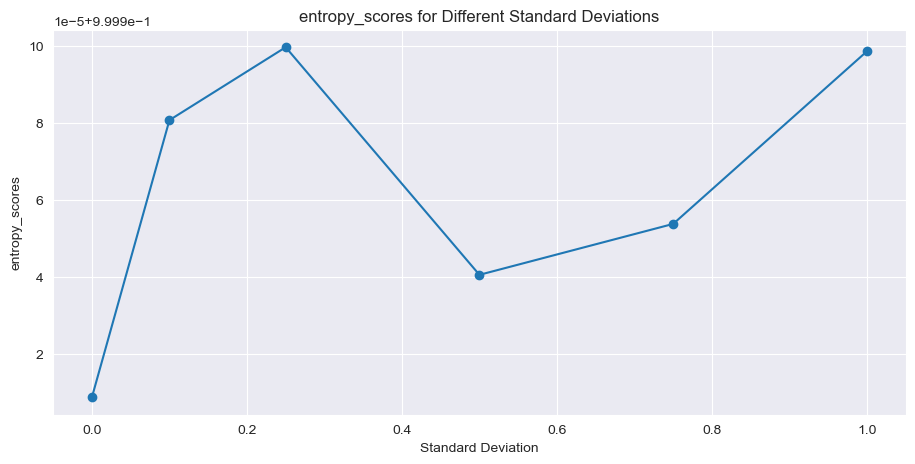

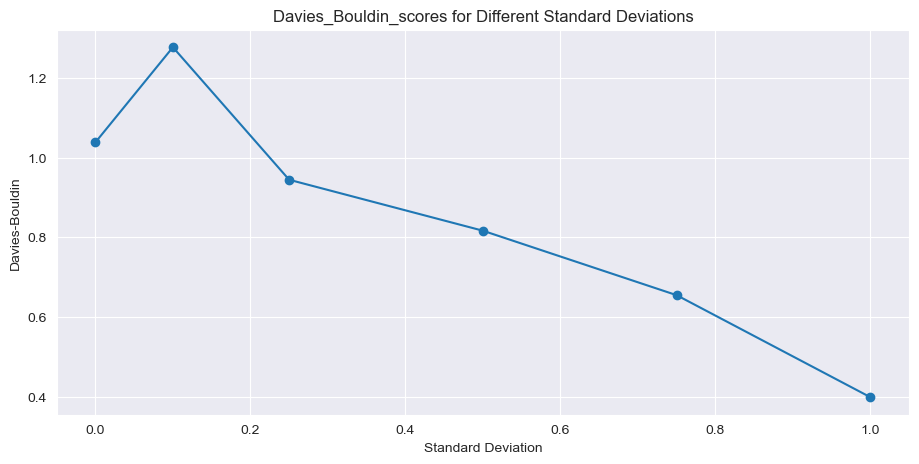

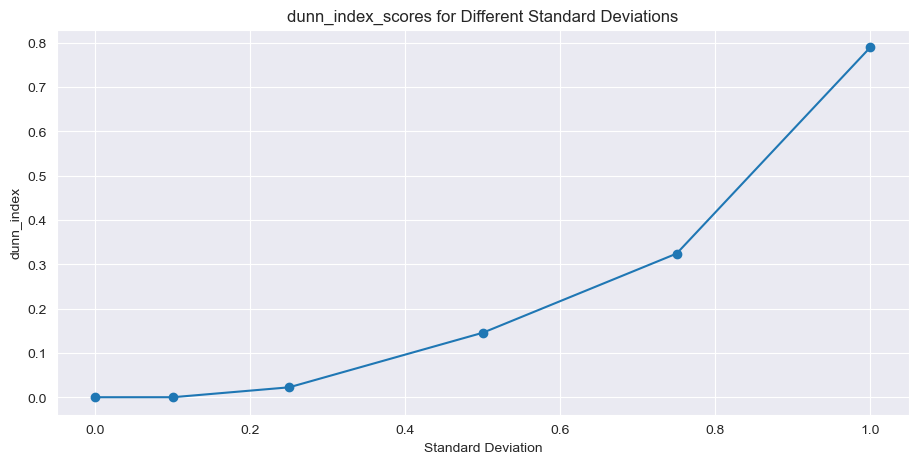

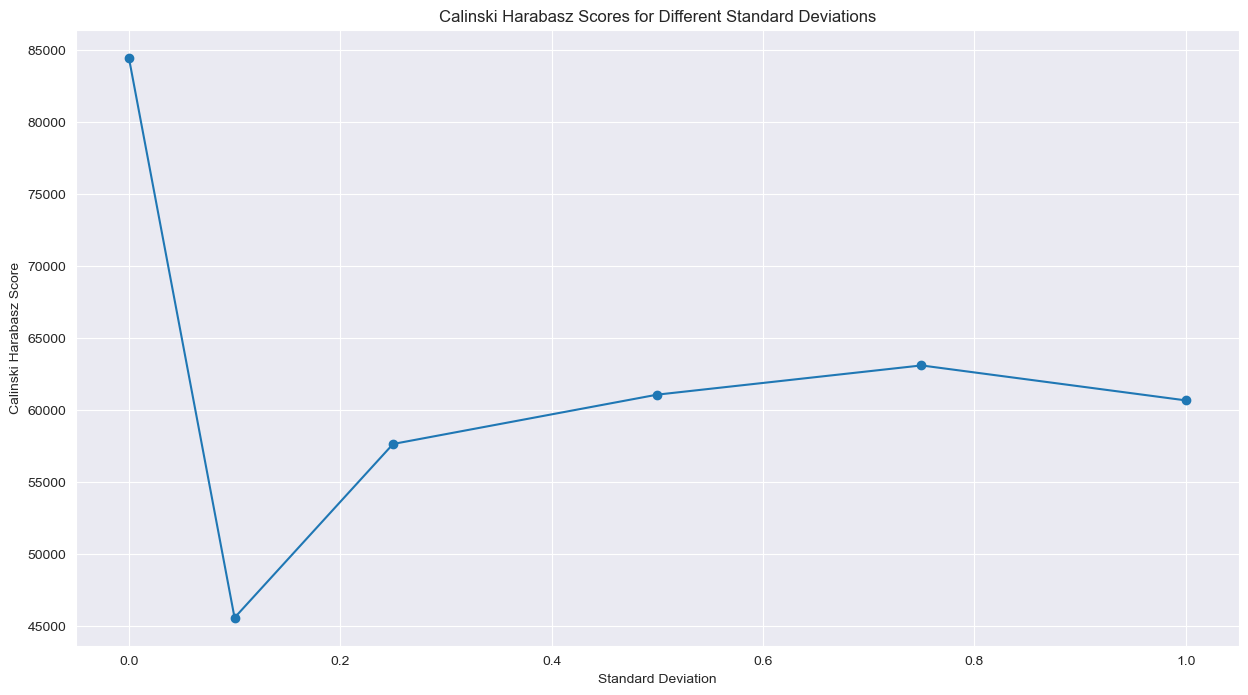

In [99]:
# Array per i valori delle metriche
silhouette_scores = []  
entropy_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []
dunn_index_scores = [] 
gap_scores = []

#deviazione standard
cds = [2, 1.75, 1.5, 1.25, 1.1, 1]
rs = [1.75, 1.9, 1.75, 1.5, 1.8, 2]

fig, axs = plt.subplots(6,2, figsize=(10,20))
sns.set_style("darkgrid")
fig.tight_layout()


r = 0
c = 0
c2= 1

for i,s in enumerate(cds):
    centers = np.array([[0,-s],[0,s]])
    X, y = make_blobs(n_samples=1000000, centers=centers, cluster_std=2)

    cond1 = (((X[:,0]-0)**2 + (X[:,1] - (-s))**2) <= rs[i])
    cond2 = (((X[:,0]-0)**2 + (X[:,1] - s)**2) <= rs[i])
    X_temp = X[(((cond1) & (y == 0)) | ((cond2) & (y == 1))) & (np.abs(X[:,1]) <= 1)]
    y = y[(((cond1) & (y == 0)) | ((cond2) & (y == 1))) & (np.abs(X[:,1]) <= 1)]
    X = X_temp

    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, ax=axs[r,c])

    axs[r,c].set_xlim(-1,1)
    axs[r,c].set_ylim(-1,1)
    #axs[r,c].set_xticks([])
    #axs[r,c].set_yticks([])
    axs[r,c].get_legend().remove()
    
    data = pd.DataFrame(np.zeros((X.shape[0], 3)))
    data.iloc[:, [0,1]] = X
    data.iloc[:, 2] = y
    data.iloc[:1000,:].to_csv("circles_cluster_" + str(s) + ".csv")

    km = KMeans(n_clusters=2, n_init=1, random_state=0)
    km.fit(X)
    l = km.labels_
    cs = km.cluster_centers_
    if cs[0,1] > cs[0,0]:
        l = [1 if x == 0 else 0 for x in l]
    
    #calcolo silhouette
    silhouette_avg = silhouette_score(X, l)
    silhouette_scores.append(silhouette_avg)
    
    #calcolo entropia
    entropy_val = entropy(np.bincount(l) / len(l), base=2)
    entropy_scores.append(entropy_val)
    
    #calcolo Calinski-Harabasz index
    calinski_harabasz_index = calinski_harabasz_score(X, l)
    calinski_harabasz_scores.append(calinski_harabasz_index)
    
    # Calcolo Davies-Bouldin
    davies_bouldin_avg = davies_bouldin_score(X, l)
    davies_bouldin_scores.append(davies_bouldin_avg)
    
    # Calcolo Dunn index
    dunn_score = dunn_index(X, l)
    dunn_index_scores.append(dunn_score)
    
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=l, ax=axs[r,c2])

    #axs[c,r].set_xticks([])
    #axs[c,r].set_yticks([])
    axs[r,c2].set_xlim(-1,1)
    axs[r,c2].set_ylim(-1,1)
    axs[r,c2].get_legend().remove()
    
    r += 1
    
# Stampa degli array
print("Silhouette Scores:")
for score in silhouette_scores:
    print(score)

print("\nEntropy Scores:")
for score in entropy_scores:
    print(score)
    
print("\nCalinski Harabasz Scores:")
for score in calinski_harabasz_scores:
    print(score)

print("\nDavies-Bouldin Scores:")
for score in davies_bouldin_scores:
    print(score)
    
print("\nDunn-Index Scores:")
for score in dunn_index_scores:
    print(score)

# Plot delle variazioni di Silhouette
plt.figure(figsize=(11, 5))
plt.plot(sds, silhouette_scores, marker='o')
plt.title('silhouette_scores for Different Standard Deviations')
plt.xlabel('Standard Deviation')
plt.ylabel('silhouette_scores')
plt.grid(True)
plt.show()

# Plot delle variazioni di Entropy
plt.figure(figsize=(11, 5))
plt.plot(sds, entropy_scores, marker='o')
plt.title('entropy_scores for Different Standard Deviations')
plt.xlabel('Standard Deviation')
plt.ylabel('entropy_scores')
plt.grid(True)
plt.show()

# Plot delle variazioni di Davies_Bouldin
plt.figure(figsize=(11, 5))
plt.plot(sds, davies_bouldin_scores, marker='o')
plt.title('Davies_Bouldin_scores for Different Standard Deviations')
plt.xlabel('Standard Deviation')
plt.ylabel('Davies-Bouldin')
plt.grid(True)
plt.show()

# Plot delle variazioni di dunn_index
plt.figure(figsize=(11, 5))
plt.plot(sds, dunn_index_scores, marker='o')
plt.title('dunn_index_scores for Different Standard Deviations')
plt.xlabel('Standard Deviation')
plt.ylabel('dunn_index')
plt.grid(True)
plt.show()


# Plot Calinski Harabasz Scores
plt.figure(figsize=(15, 8))
plt.plot(sds, calinski_harabasz_scores, marker='o')
plt.title('Calinski Harabasz Scores for Different Standard Deviations')
plt.xlabel('Standard Deviation')
plt.ylabel('Calinski Harabasz Score')
plt.grid(True)
plt.show()

fig.savefig("circles.png", facecolor="gray")